In [3]:
import numpy as np
import matplotlib.pyplot as plt

mean_opinion = [[0.5], [0.5], [0.5], [0.6], [0.4], [0.4], [0.4],
                [0.1, 0.6], [0.1, 0.6], [0.1, 0.6], [0.1, 0.6], [1, 0.4], [1, 0.4], [1, 0.4],
                [1, 0.4], [0.8, 0.2], [0.7, 0.2], [0.7, 0], [0.2, 0.5], [0.4, 0.8],
                [1, 0.55, 0.1], [0.9, 0.5, 0.1]]

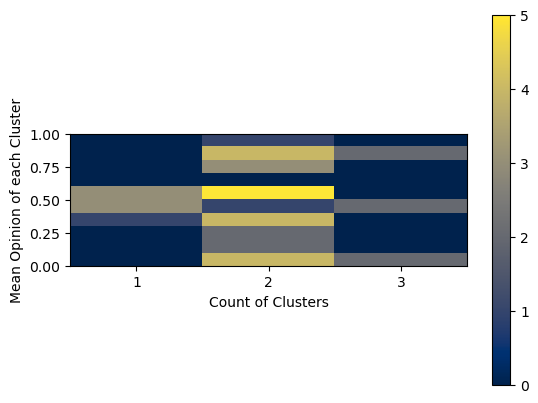

In [4]:
def heatmap(mean_opinion):

    x_len = max(len(x) for x in mean_opinion)# the length of the X-axis of the plot

    interval_size = 10  # how many intervals in [0,1]
    data = np.zeros((x_len, interval_size))  # Create a map

    intervals = [[start/interval_size, (start + interval_size)/interval_size] for start in range(
        0, interval_size**2, interval_size)]  # Generate the interval vector using list comprehension


    for cluster in mean_opinion:
        for opinion in cluster:
            if opinion == 1:
                data[len(cluster)-1][interval_size-1] += 1
            else:
                start = [start for start, end in intervals if start <=
                        opinion*interval_size < end]
                data[len(cluster)-1][int(start[0])] += 1


    extent = [1, x_len+1, 0, 1]
    plt.imshow(data.T, cmap='cividis', extent=extent)
    plt.colorbar()


    plt.xlabel('Count of Clusters')
    plt.ylabel('Mean Opinion of each Cluster')  # Terrible names

    xticks_1 = np.arange(1.5, x_len + 1.1, 1).tolist()
    xticks_2 = [f'{i}' for i in range(1, x_len + 1)]
    plt.xticks(xticks_1, xticks_2)

    plt.show()
heatmap(mean_opinion)